In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.animation import FuncAnimation

In [113]:
# Laplacian matrix

Del2 = np.array([[0.05, 0.2, 0.05], [0.2, -1, 0.2], [0.05, 0.2, 0.05]])

In [114]:
# Parameters

# Diffusion rates
Da = 1.0
Db = 0.5

f = 0.055      # feed rate
k = 0.062      # kill rate

dt = 1.0       # Delta t between iterations
n = 500        # Total number of iterations

In [115]:
# Initializing grid with concentrations A and B

x = 500
y = 500
A = np.ones((x, y))
B_no_seed = np.zeros((x, y))

In [116]:
def convolve(X, Y, Del2):
    
    X_conv = signal.convolve2d(X, Del2, mode='same')
    Y_conv = signal.convolve2d(Y, Del2, mode='same')
    
    return X_conv, Y_conv

In [117]:
def seeding(X, x_start, y_start, width, depth):
    
    x_end = x_start + width
    y_end = y_start + depth
    X[x_start:x_end, y_start:y_end] = 1
    
    return X

startx = 200
starty = 200
w = 15
d = 15
B = seeding(B_no_seed, startx, starty, w, d)

In [118]:
# def init():
    
#     pos.set_data(A)
#     return pos,

def reaction_diffusion(i):
        
        global A
        global B
        
        for i in range(n):
            
            A_conv, B_conv = convolve(A, B, Del2)
            A_new = A + (Da*A_conv - A*B**2 + f*(1-A))*dt
            B_new = B + (Db*B_conv + A*B**2 - (k+f)*B)*dt

            A = A_new
            B = B_new
        
        pos.set_array(B_new)
        
        return pos,

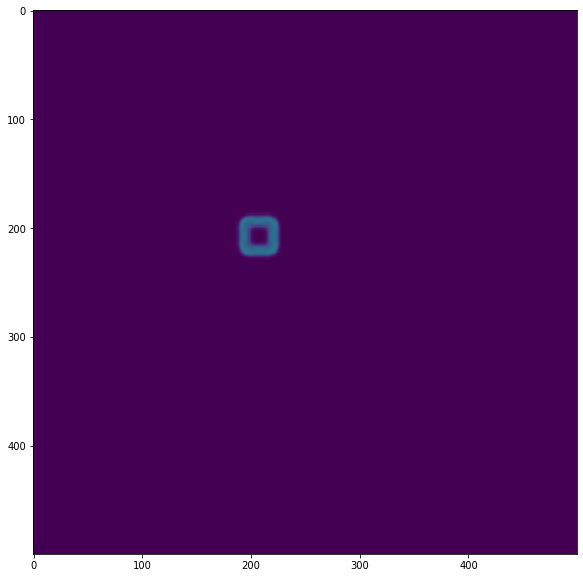

In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = ax.imshow(B, cmap='viridis')

anim = FuncAnimation(fig, reaction_diffusion, frames=range(n), blit=True)
plt.show()